1950465 Abraham Emanuel Cazares Avila 
Hora: N1 (L,V,M)

Importamos Librerias de tensorflow

In [63]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [64]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test)= mnist.load_data()

In [101]:
class_names = ['0 (Cero)', '1 (Uno)', '2 (Dos)', '3 (Tres)', '4 (cuatro)',
               '5 (Cinco)', '6 (seis)', '7 (Siete)', '8 (Ocho)', '9 (nueve)']

 Exploramos todo el set de datos antes de entrenar nuestro modelo. Lo siguiente celda de codigo nos muestra que hay 60,000 imagenes y que cada una de ellas cuenta con un tamaño de 28x28 pixeles

In [102]:
x_train.shape 

(60000, 28, 28)

In [127]:
#Muestra que hay 60 etiquetas en nuestro set de entrenamiento
len(y_train)

60000

In [104]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [128]:
#Tomamos 10,000 imagenes como pruebas
x_test.shape

(10000, 28, 28)

In [106]:
len(x_test)

10000

El set de datos debe ser pre-procesadao antes de entrenar la red. Si se inspecciona la primera imagen en el set de entrenamiento, se encontrara con que cada pixel de una imagen estan entre 0 y 255 esto es por la escala de grises:

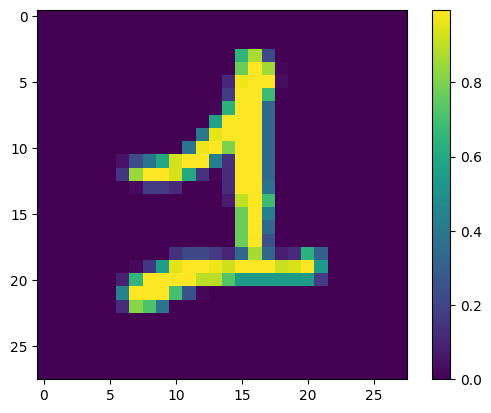

In [107]:
plt.figure()
plt.imshow(x_train[24])
plt.colorbar()
plt.grid(False)
plt.show()

Escalamos los valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores entre 255.Basicamente estamos haciendo una normalizacion:

In [108]:
x_train = x_train/255.0
x_test  = x_test/255.0

Mandamos llamar las primeras 25 imagenes de el training set y se muestran con el nombre de cada clase debajo de cada imagen.

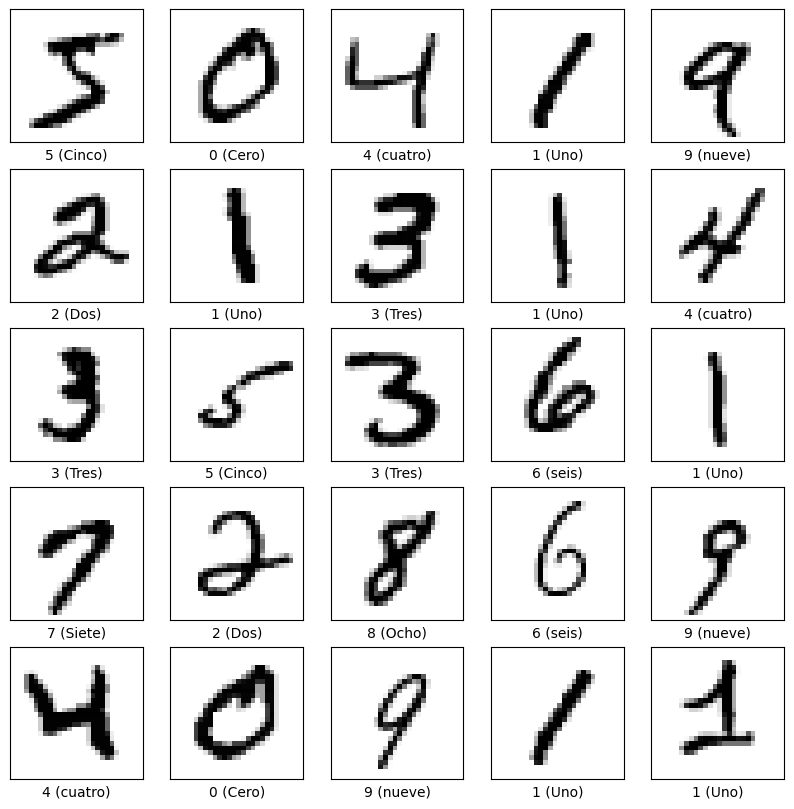

In [109]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
Construimos un modelo para configurar las capas

In [110]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compilamos el modelo

In [111]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenamos el modelo, el modelo aprende a asociar imagenes y a medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.92 (o 92%) sobre el set de datos de entrenamiento 

In [112]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.1560 - accuracy: 0.7205
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4796 - accuracy: 0.8743
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3798 - accuracy: 0.8955
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3393 - accuracy: 0.9039
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3152 - accuracy: 0.9095
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2984 - accuracy: 0.9151
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2850 - accuracy: 0.9183
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2733 - accuracy: 0.9210
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2636 - accuracy: 0.9238
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss

Evaluamos la exactitud de nuestro modelo y resulta ser de 93%

In [113]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=3)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9305999875068665


Hacemos predicciones con el modelo y una prediccion es un arreglo de 10 numeros. Donde se muestra el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 numeros manuscritos

In [114]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [129]:
predictions[0]

array([1.7507753e-04, 3.7196841e-08, 1.5920434e-04, 4.4443514e-03,
       1.4526435e-07, 7.2174313e-05, 1.3876946e-09, 9.9378639e-01,
       3.0461539e-05, 1.3320905e-03], dtype=float32)

In [115]:
np.argmax(predictions[0])

7

In [116]:
y_test[0]


7

*Graficamos esto para poder ver todo el set de la prediccion de las 10 clases.*

In [118]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

Hacemos unas predicciones como ejemplo


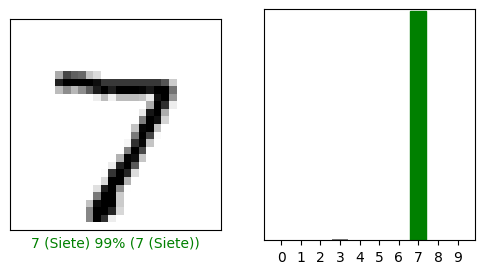

In [119]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

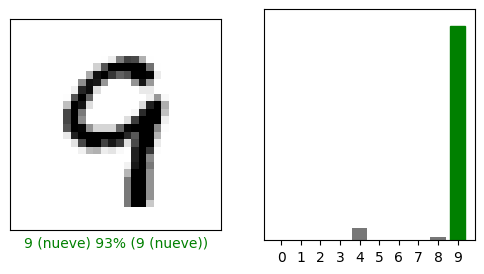

In [120]:
i = 150
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Posteriprmente motramos algunas pruebas del aprendizaje de nuestro modelo, debe tener una exactitudaproximadad del 73%; color verde es la predicción correcta y que la de color rojo es la incorrecta

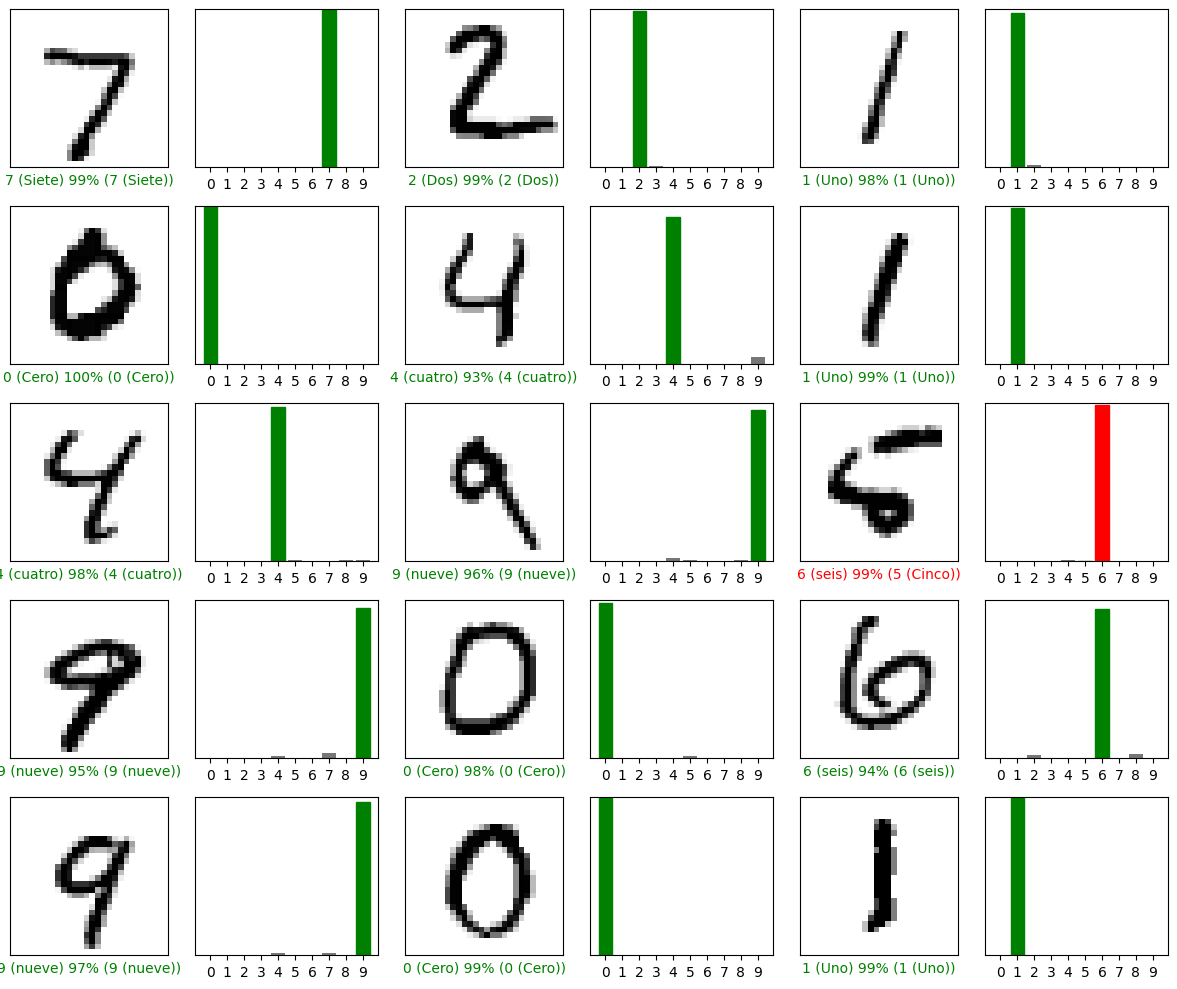

In [121]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Por ultimo hacemos una prediccion con nuestro modelo ya entrenado sobre una sola imagen

In [130]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

(28, 28)


In [140]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 1, 28, 28, 1)


In [134]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 74ms/step
[[5.5963430e-04 3.4258173e-05 9.8896563e-01 5.8460929e-03 9.0750870e-12
  1.8201210e-03 2.1882388e-03 1.3846443e-10 5.8606255e-04 1.3069028e-10]]


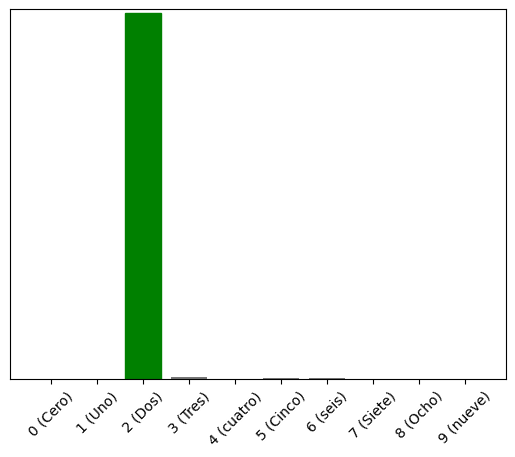

In [136]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
     

In [138]:
np.argmax(predictions_single[0])

2